In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [45]:
experience_version_report = 3

In [46]:
# 0.634 --> Experience 1
# 0.777 --> Experience 2
# 0.592 --> Experience 3
df = None
dummy_score = 0
if experience_version_report == 1:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="Original")
    dummy_score = 0.634
elif experience_version_report == 2:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="ProjetosAnulados_Filtrados")
    dummy_score = 0.777
else:
    df = pd.read_excel('./Output/Results_ML_OFICIAL2.xlsx', sheet_name="NewDataset")
    dummy_score = 0.592


In [47]:
df

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.971549,0.964981,0.932331,1.000000,...,0.583333,0.617658,105,148,79,75,577,372,227,180
1,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.546891,0.601113,0.458924,0.870968,...,0.822222,0.571904,148,73,154,32,577,372,227,180
2,K-NearestNeighbors,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.727081,0.626263,0.676012,0.583333,...,0.422222,0.550318,76,154,73,104,577,372,227,180
3,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.645943,0.577889,0.542453,0.618280,...,0.566667,0.622540,102,154,73,78,577,372,227,180
4,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.704953,0.525424,0.711009,0.416667,...,0.427778,0.638999,77,193,34,103,577,372,227,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,LogisticRegression,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.642981,0.648464,0.638655,0.658579,...,0.588889,0.611625,106,144,83,74,577,577,227,180
401,MLPClassifier,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.805893,0.801770,0.819168,0.785095,...,0.605556,0.677227,109,170,57,71,577,577,227,180
402,Perceptron,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.593588,0.674532,0.562500,0.842288,...,0.783333,0.561270,141,77,150,39,577,577,227,180
403,RandomForest,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.976603,0.977138,0.955298,1.000000,...,0.644444,0.692266,116,168,59,64,577,577,227,180


In [48]:
#display(df_clean.loc[:, ['Model', 'Experience', 'Features_List', 'Accuracy_Test']].sort_values(by=['Accuracy_Test'], ascending=False))

### Filtrar experiência com resultados inferiores ou iguais ao Dummy + Modelos overfit

In [49]:
select_columns = [
    'Model',
    'Experience',
    'ExperienceNumber',
    'ExperienceVersion',
    'Features_List',
    'Nr_Features',
    'Accuracy_Test',
    'F1_Test',
    'Precision_Test',
    'Recall_Test',
    'ROC_AUC_Test',
    'TP',
    'TN',
    'FP',
    'FN',
    '#Terminados(Teste)',
    '#AnuladosPosContrato(Teste)'
]

In [50]:
# Excluir experiencias com precisão de teste inferior ao dummy + experiências em que a precisão nos datasets de treino sejam = 1
df_clean = df.loc[(df['Accuracy_Test'] >= dummy_score) & (df['Accuracy_Train'] != 1)]

In [51]:
print('Número de experiências em que o modelo deu overfit: ', len(df[df['Accuracy_Train'] ==1]))

Número de experiências em que o modelo deu overfit:  0


In [52]:
print('Número de experiências em que o modelo não superou o dummy: ', len(df[df['Accuracy_Test'] < dummy_score]))

Número de experiências em que o modelo não superou o dummy:  32


In [53]:
df.shape

(405, 24)

In [54]:
df_clean.shape

(373, 24)

In [55]:
print("Filtraram-se %i registos" % (df.shape[0] - df_clean.shape[0]))

Filtraram-se 32 registos


In [56]:
display(df_clean[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.621622,0.576923,0.570652,0.583333,0.617658,105,148,79,75,227,180
3,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.628993,0.574648,0.582857,0.566667,0.622540,102,154,73,78,227,180
4,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180
5,MLPClassifier,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.636364,0.593407,0.586957,0.600000,0.632599,108,151,76,72,227,180
7,RandomForest,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.690418,0.585526,0.717742,0.494444,0.670130,89,192,35,91,227,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,LinearSupportVectorClassification,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.619165,0.584450,0.564767,0.605556,0.617756,109,143,84,71,227,180
400,LogisticRegression,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.614251,0.574526,0.560847,0.588889,0.611625,106,144,83,74,227,180
401,MLPClassifier,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.685504,0.630058,0.656627,0.605556,0.677227,109,170,57,71,227,180
403,RandomForest,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.697789,0.653521,0.662857,0.644444,0.692266,116,168,59,64,227,180


In [57]:
list_models_clean = df_clean['Model'].unique().tolist()
list_models_original = df['Model'].unique().tolist()

In [58]:
print('Modelos excluídos')
print(list(set(list_models_original) - set(list_models_clean)))

Modelos excluídos
[]


# Análise de resultados

Foram realizadas 3 tipos de experiências para 3 datasets diferentes:

    1. Com os dados originais em que foram filtrados projetos em que não conseguíamos obter informação antes do ano de candidatura

    2. Aplicação de mais um filtro de projetos para a classe dos projetos anulados. Dentro dos projetos anulados foram apenas escolhidos os projetos em que o motivo de anulação foi devido à "Desistência do promotor".
    
    3. Inclusão dos projetos filtrados inicialmente no ponto 1, são incluído no dataset no entanto todas as features relacionadas com os rácios de performance em relação ao projeto são substituídos pelo valor 0. Aumentando o conjunto de dados. 

### Retirar os melhores resultados para cada modelo

In [59]:
# Pode haver vários modelos com scores as melhores score
best_models = df_clean.groupby('Model')['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models)

,Model,max
0,DecisionTree,0.675676
1,GaussianNaiveBayes,0.675676
2,K-NearestNeighbors,0.710074
3,LinearSupportVectorClassification,0.690418
4,LogisticRegression,0.705160
5,MLPClassifier,0.710074
6,Perceptron,0.700246
7,RandomForest,0.722359
8,SupportVectorClassification,0.697789


#### O que se observar
1. Observar A experiencia que se repete mais
2. O tipo de features mais utilizadas
3. Observação da evolução das métricas ao longo das experiências

In [60]:
# Histograma com experience que se repete mais
# Histograma com features que repetem mais
# Count the occurrences of each value in the 'category' column
value_experience_counts = df_clean['ExperienceNumber'].value_counts()
value_features_counts = df_clean['Features_List'].value_counts()

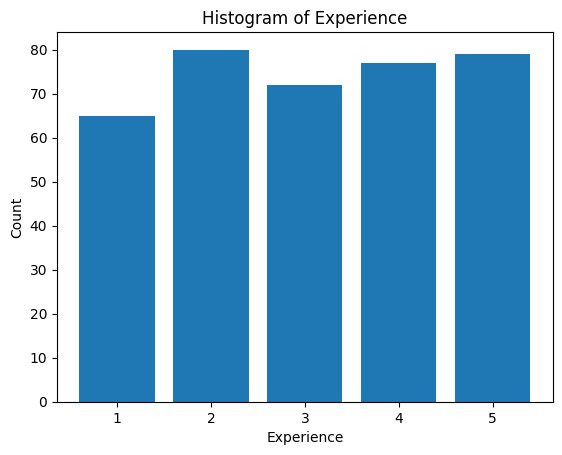

In [61]:
# Plot the histogram
plt.bar(value_experience_counts.index, value_experience_counts.values)
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Histogram of Experience')
plt.show()

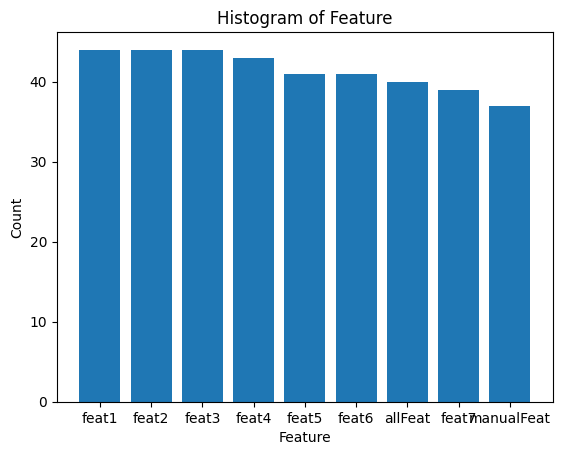

In [62]:
# Plot the histogram
plt.bar(value_features_counts.index, value_features_counts.values)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Histogram of Feature')
plt.show()

In [63]:
final_best_models = df_clean.merge(best_models, how="inner", left_on=["Model", "Accuracy_Test"], right_on=["Model", "max"])

display(final_best_models[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
1,DecisionTree,StandardScaler (without projects filtering),2,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
2,MLPClassifier,StandardScaler (without projects filtering),2,3,feat2,30,0.710074,0.628931,0.724638,0.555556,0.694077,100,189,38,80,227,180
3,K-NearestNeighbors,StandardScaler (without projects filtering),2,3,feat3,50,0.710074,0.650888,0.696203,0.611111,0.699829,110,179,48,70,227,180
4,K-NearestNeighbors,StandardScaler + PCA (without projects filtering),3,3,feat3,50,0.710074,0.650888,0.696203,0.611111,0.699829,110,179,48,70,227,180
5,LinearSupportVectorClassification,StandardScaler (without projects filtering),2,3,feat4,50,0.690418,0.580000,0.725000,0.483333,0.668979,87,194,33,93,227,180
6,LinearSupportVectorClassification,StandardScaler + PCA (without projects filtering),3,3,feat4,50,0.690418,0.580000,0.725000,0.483333,0.668979,87,194,33,93,227,180
7,LinearSupportVectorClassification,StandardScaler + SMOTE (without projects filte...,4,3,feat3,50,0.690418,0.646067,0.653409,0.638889,0.685083,115,166,61,65,227,180
8,LinearSupportVectorClassification,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat3,50,0.690418,0.640000,0.658824,0.622222,0.683358,112,169,58,68,227,180
9,GaussianNaiveBayes,StandardScaler (without projects filtering),2,3,feat7,50,0.675676,0.554054,0.706897,0.455556,0.652888,82,193,34,98,227,180


#### Comparar os resultados com as várias experiências realizadas (Modelo_Experience)

In [64]:
# Obter os melhores resultados para cada feature + modelo 
best_models_feature = df_clean.groupby(['Model', 'Experience'])['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models_feature)

,Model,Experience,max
0,DecisionTree,Baseline no pre-processing (without projects f...,0.675676
1,DecisionTree,StandardScaler (without projects filtering),0.675676
2,DecisionTree,StandardScaler + PCA (without projects filtering),0.651106
3,DecisionTree,StandardScaler + SMOTE (without projects filte...,0.636364
4,DecisionTree,StandardScaler + SMOTE + UnderSampling (withou...,0.636364
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,0.597052
6,GaussianNaiveBayes,StandardScaler (without projects filtering),0.675676
7,GaussianNaiveBayes,StandardScaler + PCA (without projects filtering),0.624079
8,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,0.658477
9,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,0.658477


### Mediana dos scores das features e comparar

In [65]:
# Obter a mediana dos scores de cada feature_experience e perceber quais são as features que obtiveram a melhor performance
feature_median = df_clean.groupby(['Features_List']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(feature_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Features_List,,,,,
allFeat,0.664619,0.598395,0.631798,0.575000,0.648544
feat1,0.675676,0.598137,0.660000,0.541667,0.654240
feat2,0.652334,0.576687,0.643836,0.522222,0.641973
feat3,0.681818,0.595432,0.696203,0.558333,0.655666
feat4,0.680590,0.595533,0.662921,0.561111,0.666300
feat5,0.673219,0.600619,0.644737,0.594444,0.656241
feat6,0.658477,0.583333,0.660920,0.516667,0.645240
feat7,0.663391,0.600567,0.631579,0.583333,0.650306
manualFeat,0.643735,0.574526,0.654867,0.516667,0.628573


### Mediana dos scores dos modelos e comparar

In [66]:
# Obter a mediana dos scores de cada modelo e perceber quais são as features que obtiveram a melhor performance
model_median = df_clean.groupby(['Model']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(model_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Model,,,,,
DecisionTree,0.633907,0.594005,0.582888,0.605556,0.628573
GaussianNaiveBayes,0.598280,0.189055,0.951190,0.105556,0.547559
K-NearestNeighbors,0.660934,0.576687,0.641168,0.522222,0.646574
LinearSupportVectorClassification,0.665848,0.580000,0.634409,0.588889,0.656070
LogisticRegression,0.667076,0.576299,0.647807,0.500000,0.657868
MLPClassifier,0.685504,0.622857,0.654762,0.600000,0.677227
Perceptron,0.632678,0.601942,0.595031,0.636111,0.626909
RandomForest,0.695332,0.602985,0.703125,0.522222,0.674829
SupportVectorClassification,0.670762,0.588235,0.666667,0.572222,0.654528


### Obter gráfico evolução das métricas

In [67]:
# Selecionar as melhores scores para cada modelo_feature em cada experiência
df_best_models_feature = df.merge(best_models_feature, left_on=["Model", "Experience", "Accuracy_Test"], right_on=["Model", "Experience", "max"], how="inner")
display(df_best_models_feature[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180
1,DecisionTree,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
2,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
6,MLPClassifier,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.668305,0.589666,0.651007,0.538889,0.654907,97,175,52,83,227,180
7,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.658477,0.471483,0.746988,0.344444,0.625967,62,206,21,118,227,180
8,SupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.665848,0.636364,0.613402,0.661111,0.665357,119,152,75,61,227,180
9,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.675676,0.503759,0.779070,0.372222,0.644261,67,208,19,113,227,180


In [68]:
# Organizar de acordo com as métricas
df_best_models_feature = df_best_models_feature.sort_values(['F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'])
df_best_models_feature['row_number'] = df_best_models_feature.groupby(["Model", "Experience"]).cumcount() + 1

display(df_best_models_feature)

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste),max,row_number
2,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,1
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,2
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,3
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,4
7,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.709168,0.492647,0.779070,0.360215,...,62,206,21,118,577,372,227,180,0.658477,1
36,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,4,3,feat6,50,0.650780,0.518519,0.834615,0.376083,...,66,202,25,114,577,577,227,180,0.658477,1
46,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat6,50,0.650780,0.518519,0.834615,0.376083,...,66,202,25,114,577,577,227,180,0.658477,1
9,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.690200,0.451493,0.737805,0.325269,...,67,208,19,113,577,372,227,180,0.675676,1
42,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat4,50,0.730503,0.694199,0.802273,0.611785,...,78,182,45,102,577,577,227,180,0.638821,1
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.704953,0.525424,0.711009,0.416667,...,77,193,34,103,577,372,227,180,0.663391,1


In [69]:
display(df_best_models_feature[['Model',
 'Experience',
 'ExperienceNumber',
 'ExperienceVersion',
 'Features_List',
 'Nr_Features',
 'Accuracy_Test',
 'F1_Test',
 'Precision_Test',
 'Recall_Test',
 'ROC_AUC_Test',
 'TP',
 'TN',
 'FP',
 'FN',
 '#Terminados(Teste)',
 '#AnuladosPosContrato(Teste)',
 "row_number"
 ]])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste),row_number
2,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,1
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,2
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,3
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,4
7,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.658477,0.471483,0.746988,0.344444,0.625967,62,206,21,118,227,180,1
36,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,4,3,feat6,50,0.658477,0.487085,0.725275,0.366667,0.628267,66,202,25,114,227,180,1
46,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat6,50,0.658477,0.487085,0.725275,0.366667,0.628267,66,202,25,114,227,180,1
9,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.675676,0.503759,0.779070,0.372222,0.644261,67,208,19,113,227,180,1
42,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat4,50,0.638821,0.514851,0.634146,0.433333,0.617548,78,182,45,102,227,180,1
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180,1


In [70]:
clean_df_best_models_feature = df_best_models_feature.loc[df_best_models_feature['row_number'] == 1].sort_values(by=["Model", "ExperienceNumber"])

In [71]:
graph_df = clean_df_best_models_feature[select_columns].copy().reset_index()

In [72]:
# display(graph_df)

In [73]:
def get_model_metric(df, model_name, metric):
    return df.loc[df['Model'] == model_name, [metric, 'ExperienceNumber']]

In [74]:
def show_report(df, model_name, metric):
    #df.reset_index()
    metric_c = metric + "_Test"
    # Plot the data using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(df['ExperienceNumber'], df[metric_c], marker='o')

    # Add labels, title, and legend
    plt.xlabel('Experience')
    plt.ylabel(metric)
    plt.title('Evolution of %s %s across Experiences' % (model_name, metric))
    plt.legend()

    # Show the plot
    plt.xticks(np.arange(1, 6, 1))
    plt.savefig("./Analysis_Results/Experience" + str(experience_version_report) + "/" + model_name + "/" + metric)
    plt.grid(True)
    plt.show()

In [75]:
models_list = [
"GaussianNaiveBayes",
"K-NearestNeighbors",
"LinearSupportVectorClassification",
"LogisticRegression",
"MLPClassifier",
"Perceptron",
"RandomForest",
"SupportVectorClassification",
]

metrics_list = [
    ('Accuracy_Test', 'Accuracy'),
    ('F1_Test', 'F1'),
    ('Recall_Test', 'Recall'),
    ('Precision_Test', 'Precision'),
    ('ROC_AUC_Test', 'ROC_AUC')
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


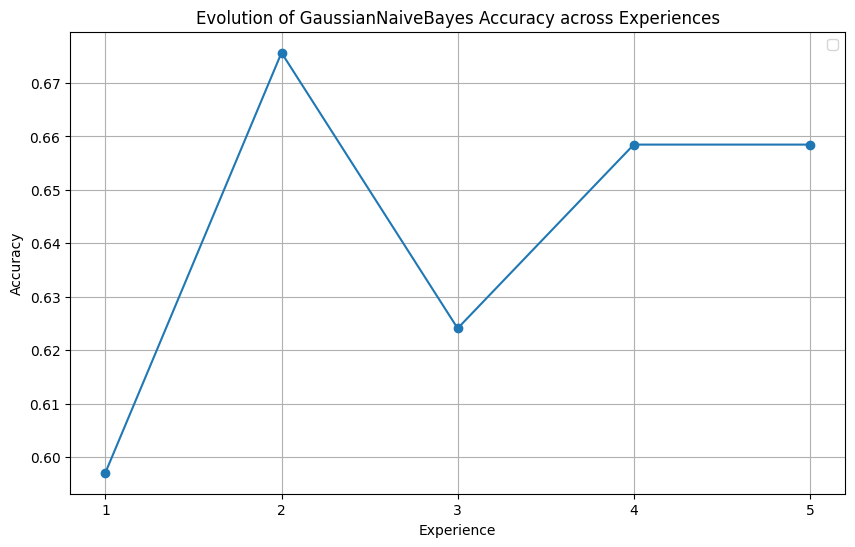

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


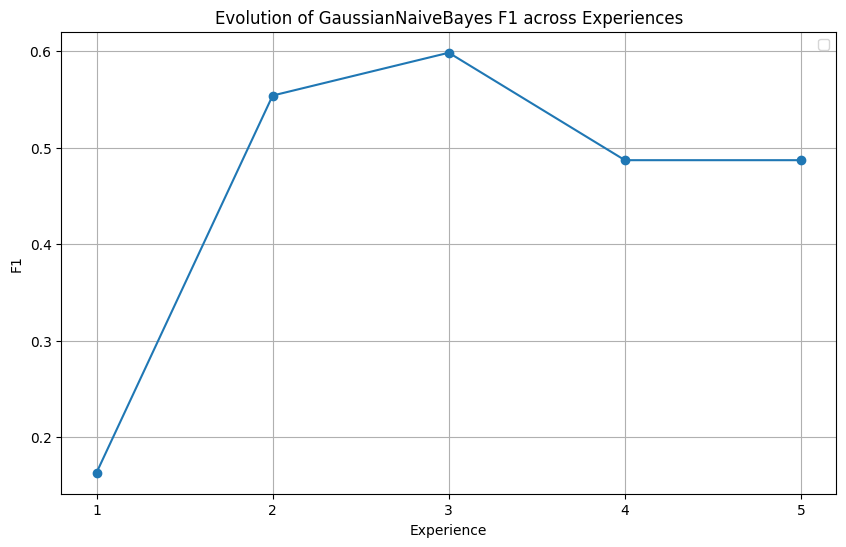

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


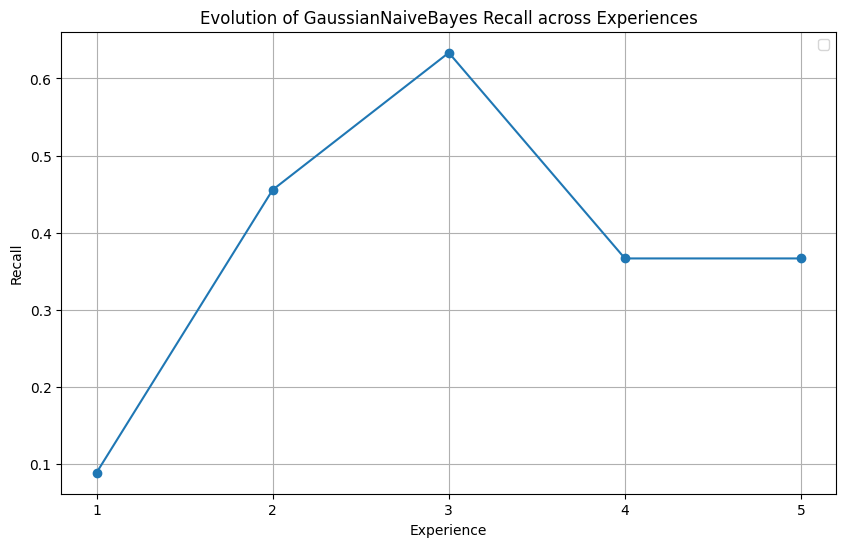

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


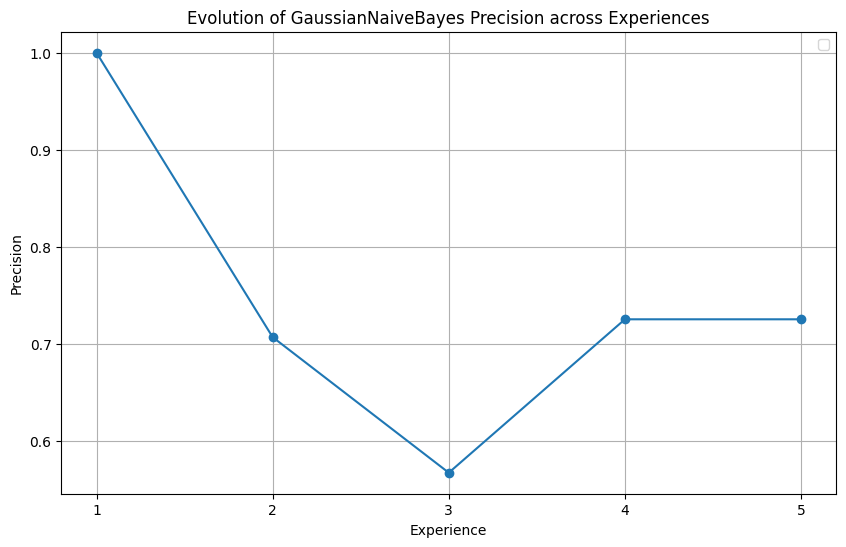

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


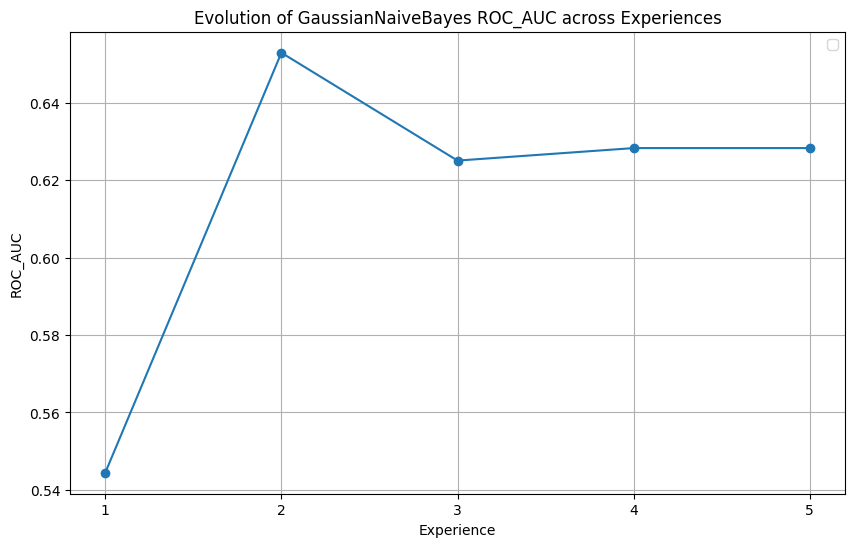

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


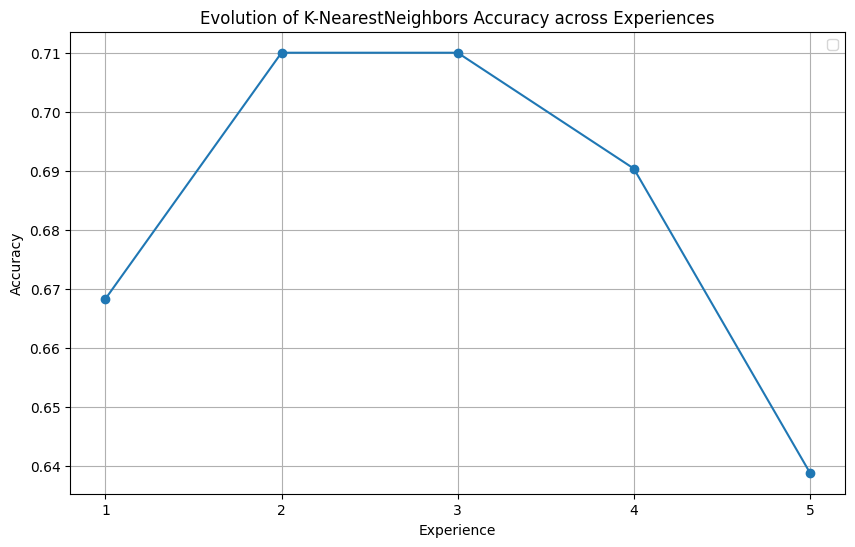

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


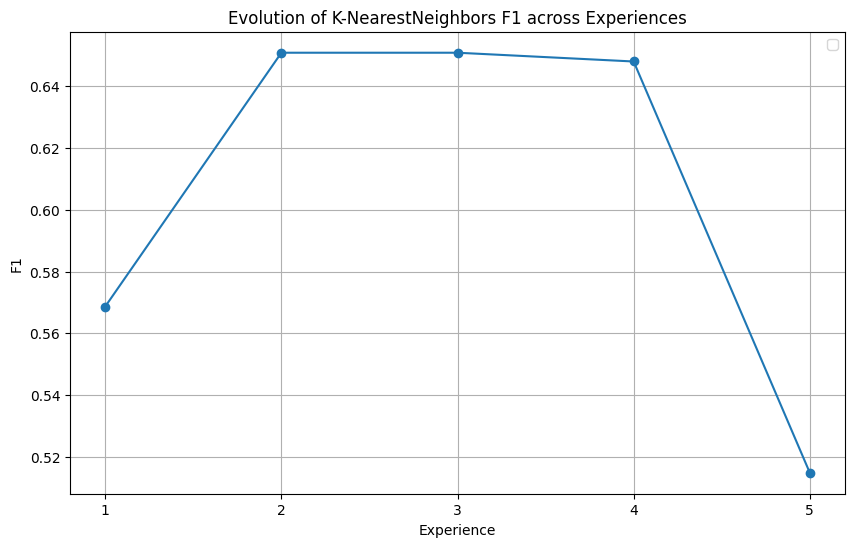

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


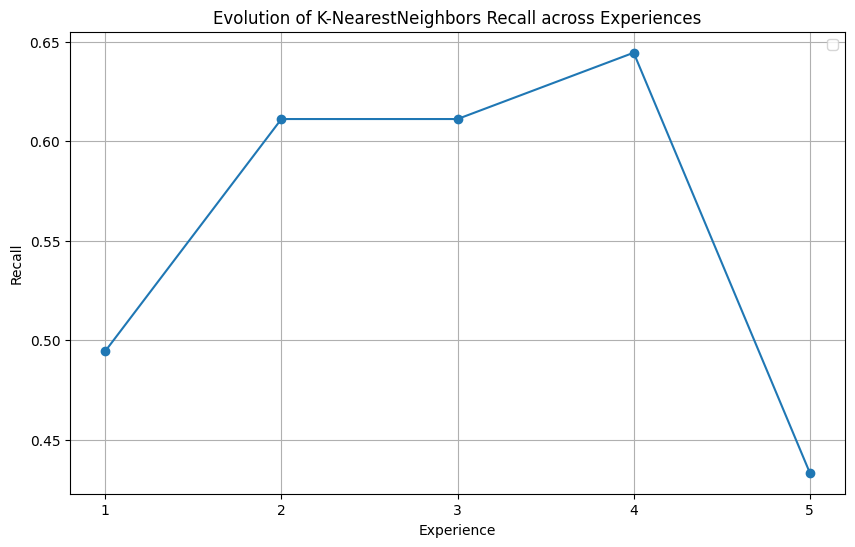

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


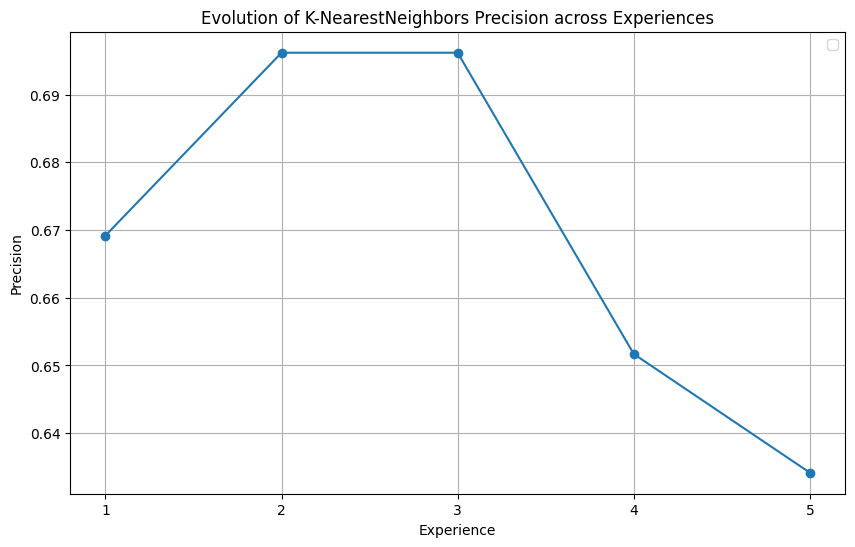

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


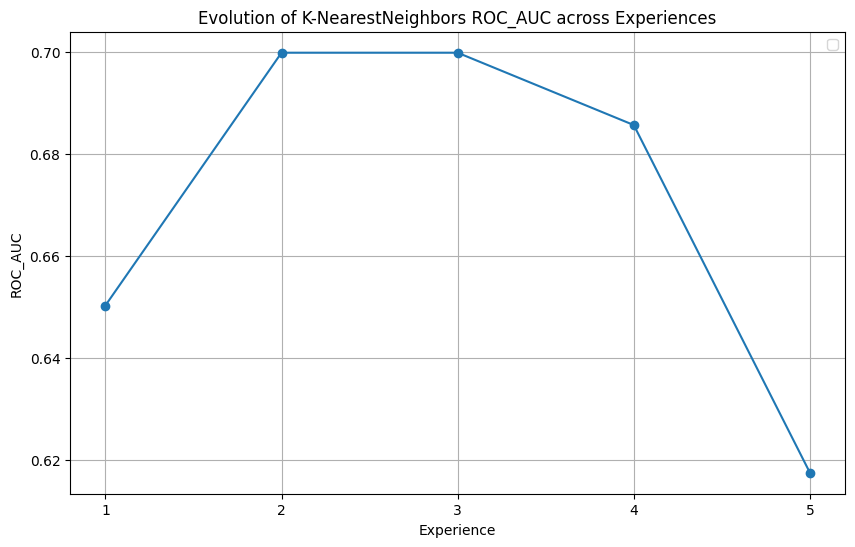

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


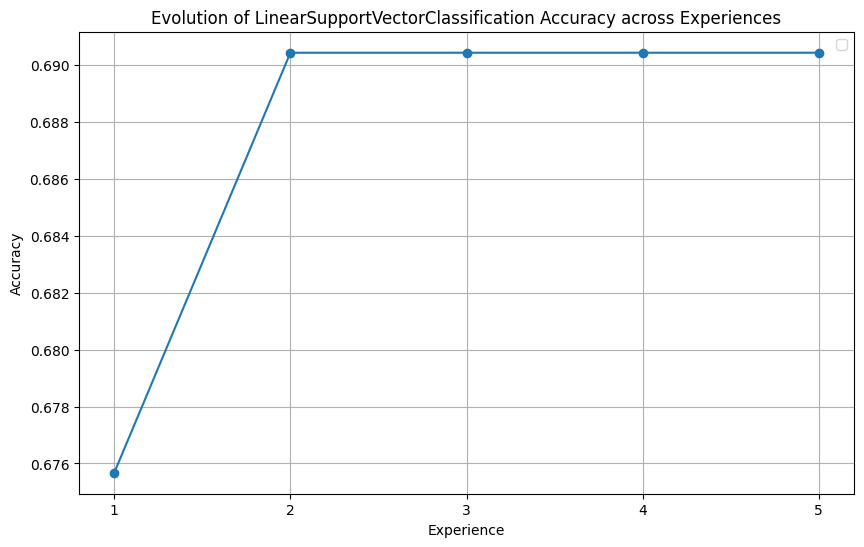

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


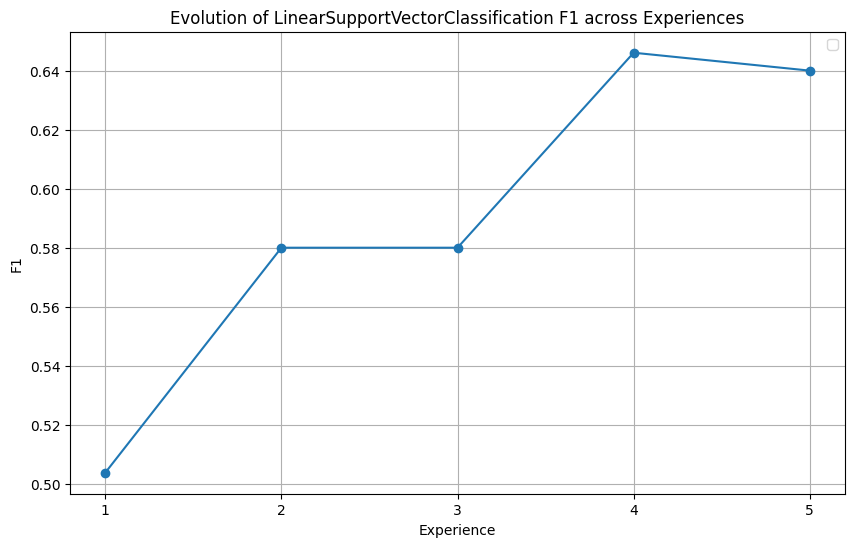

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


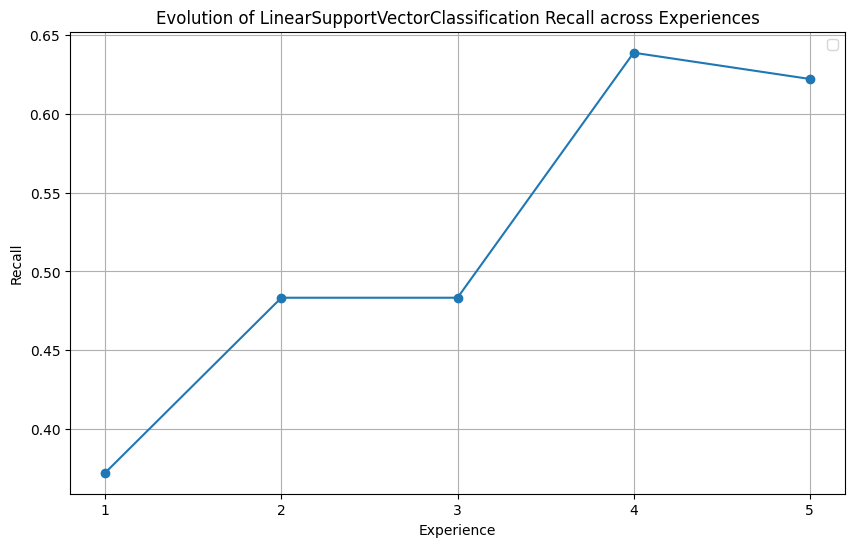

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


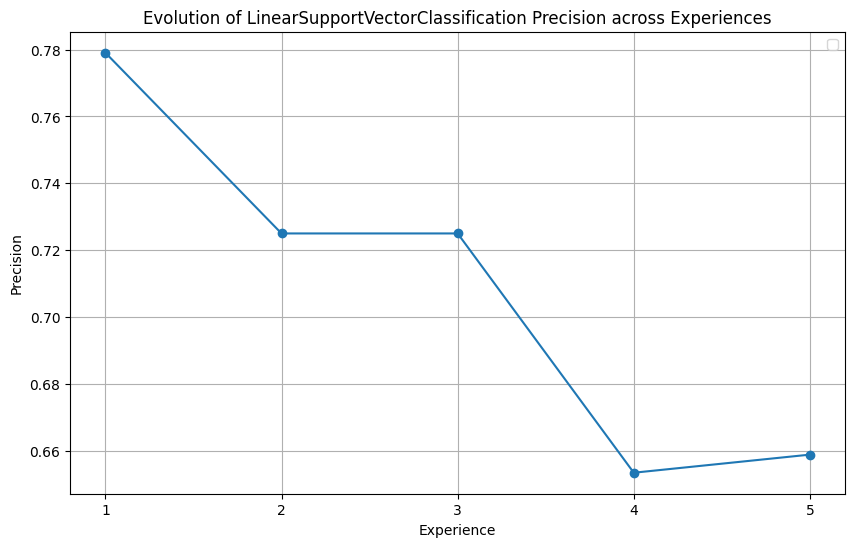

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


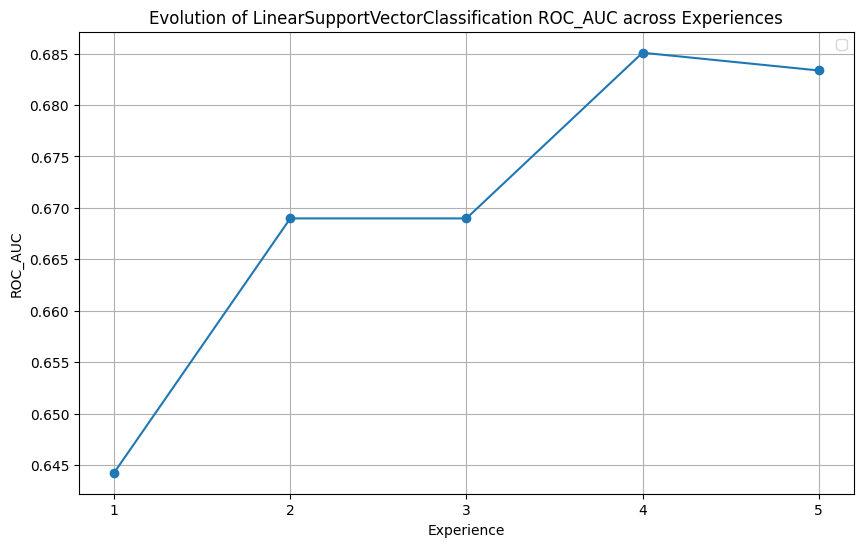

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


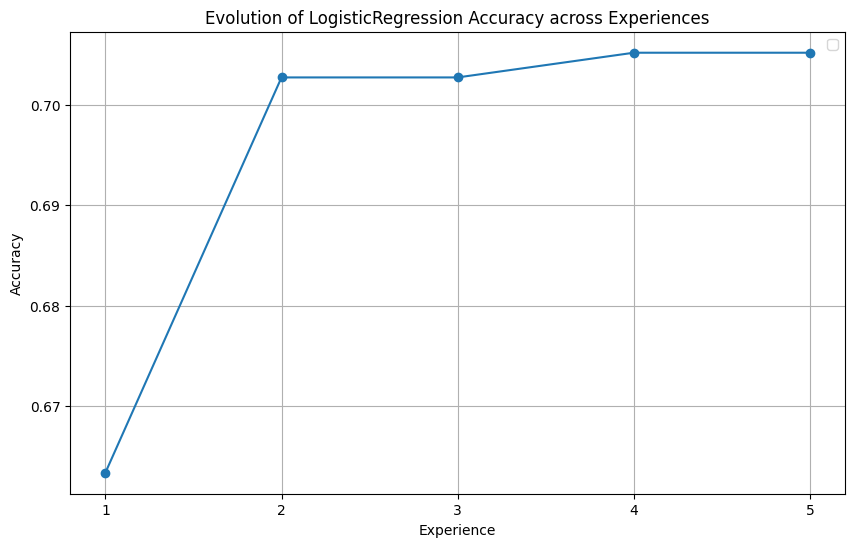

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


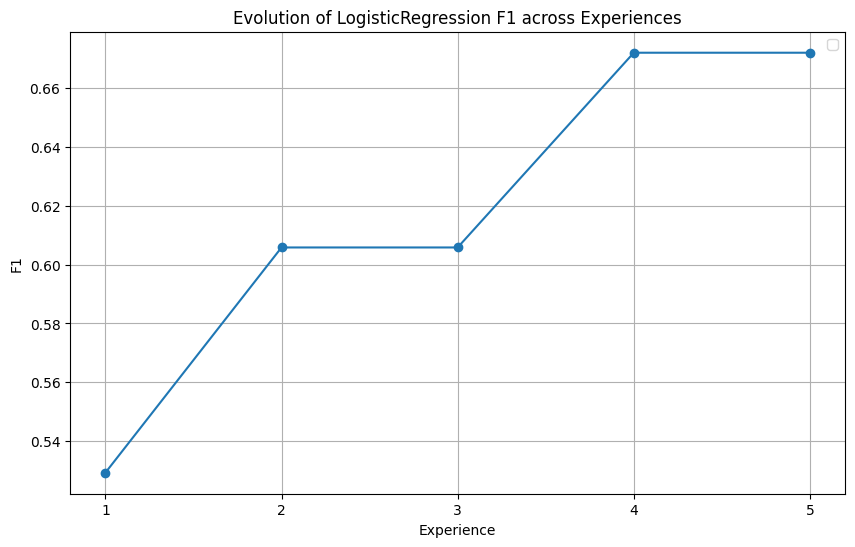

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


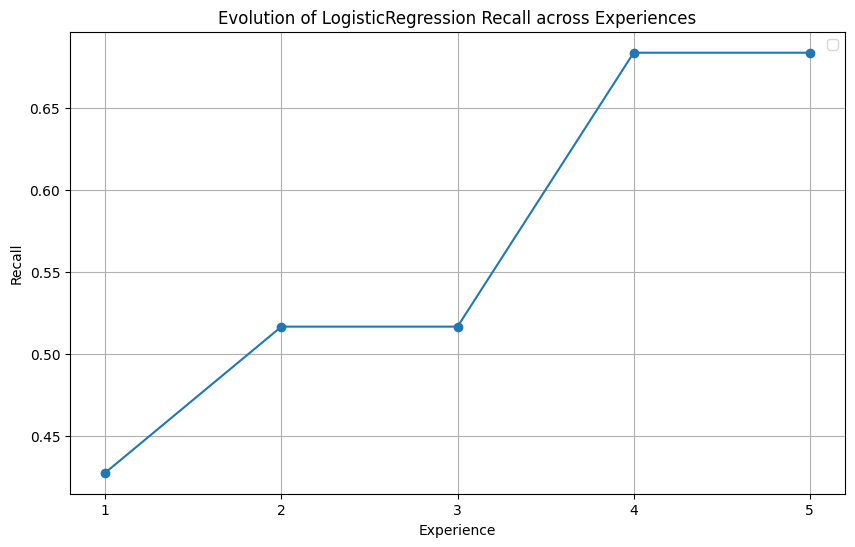

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


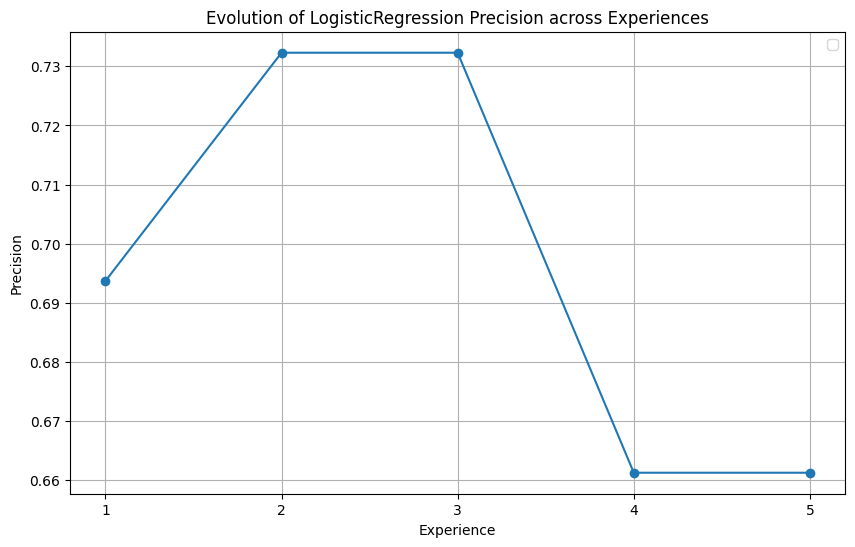

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


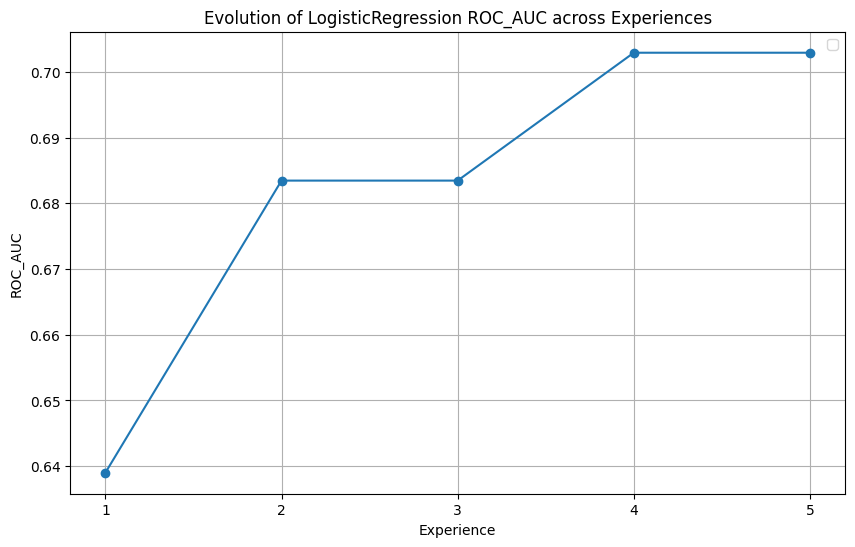

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


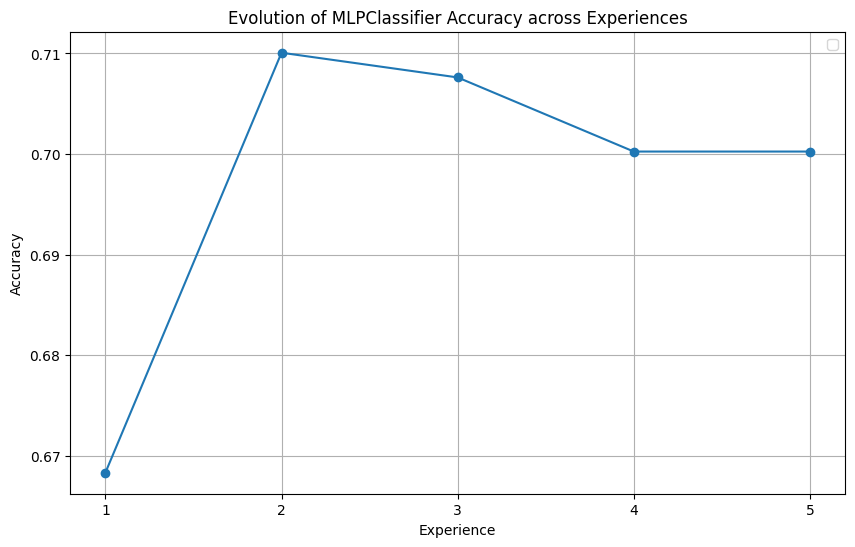

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


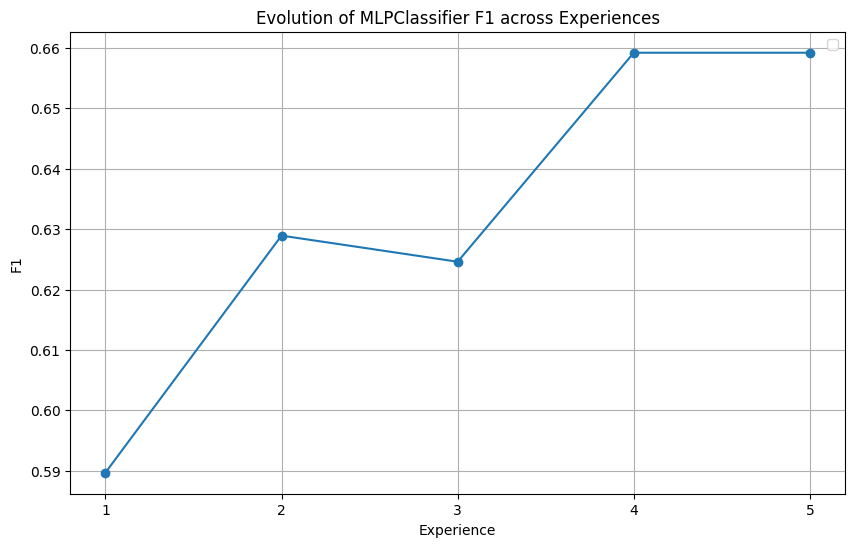

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


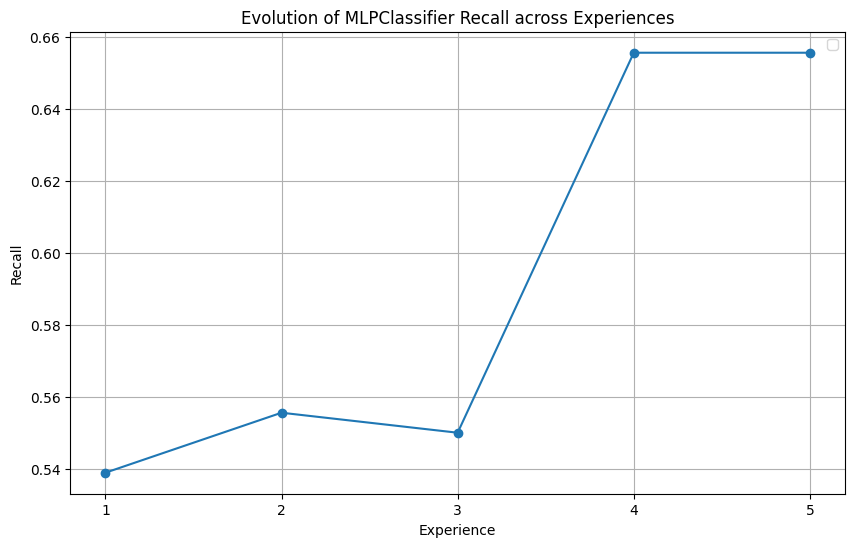

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


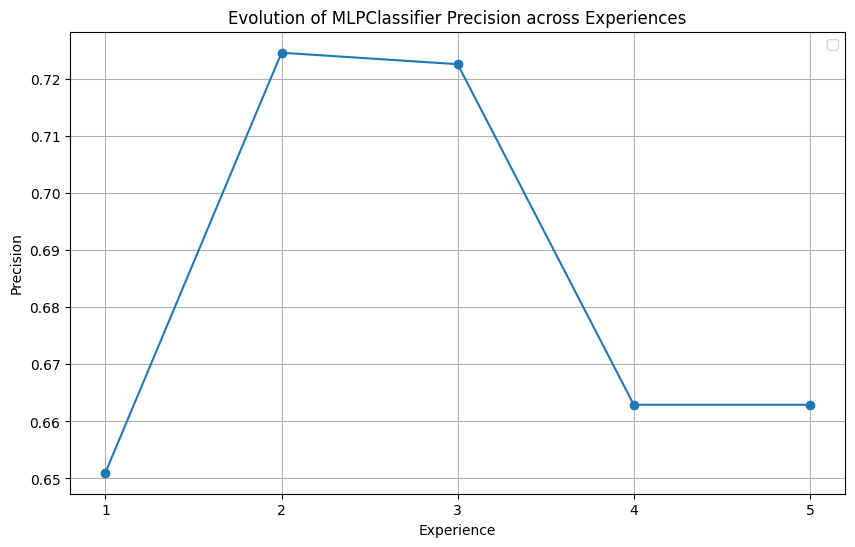

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


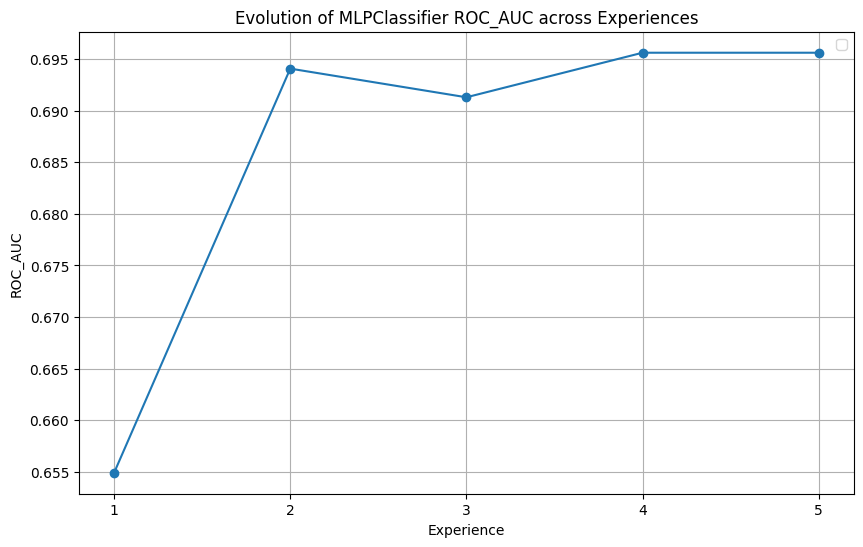

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


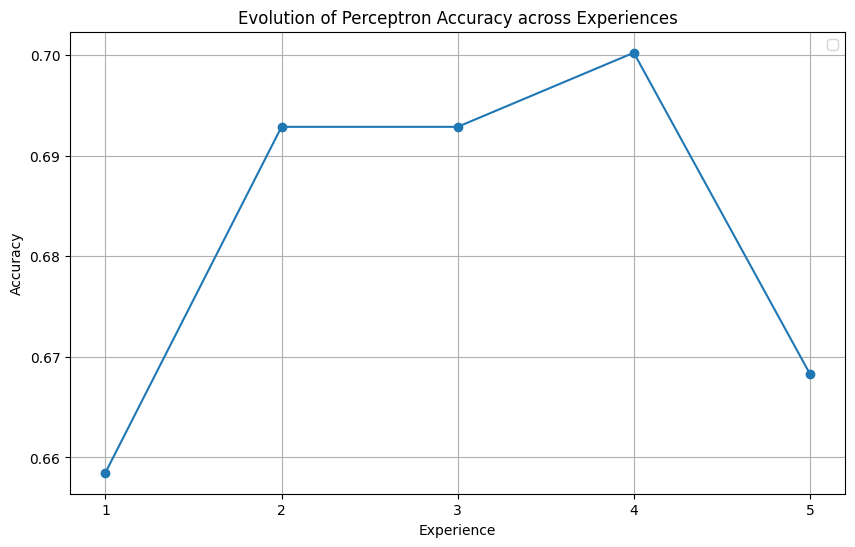

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


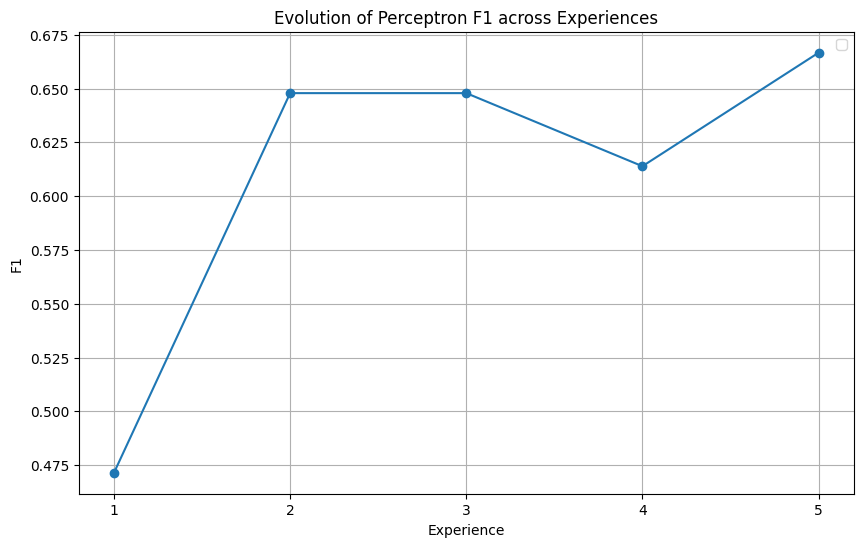

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


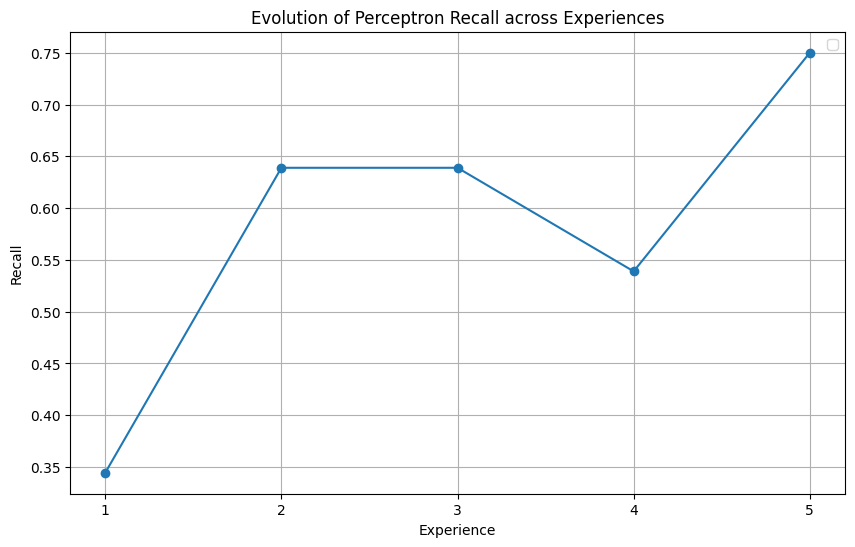

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


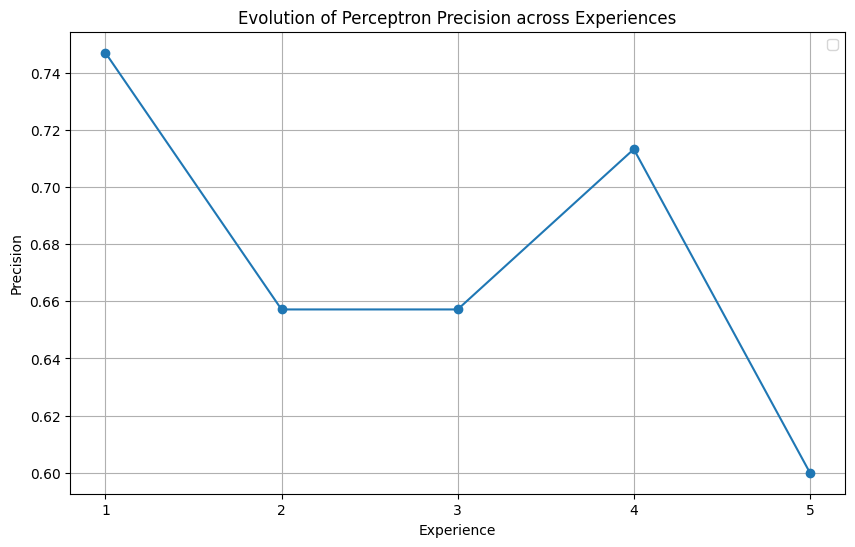

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


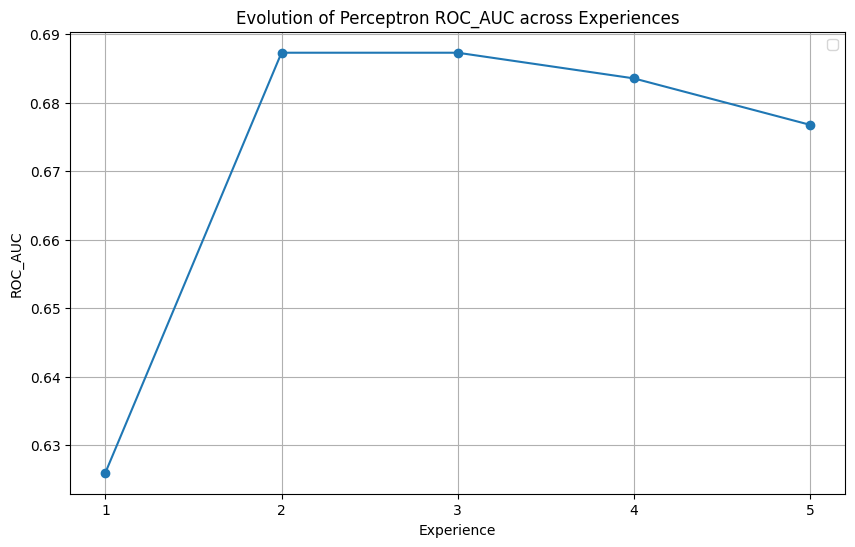

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


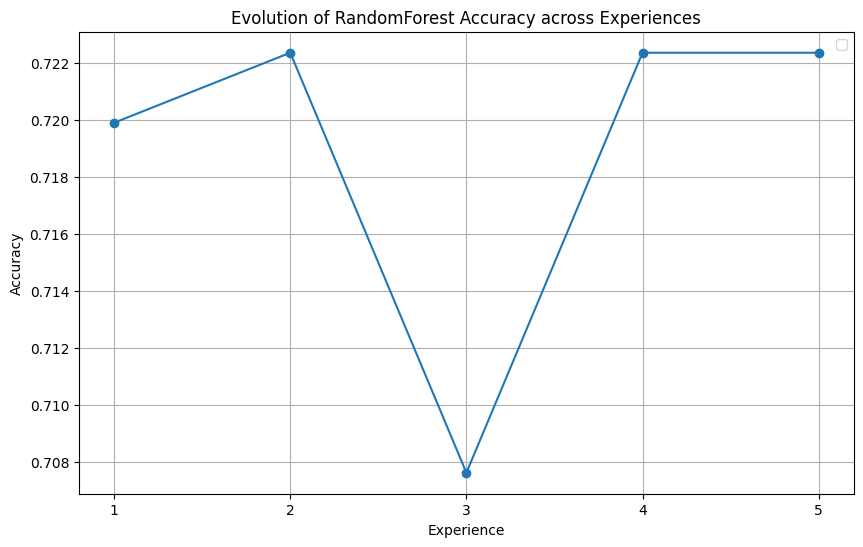

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


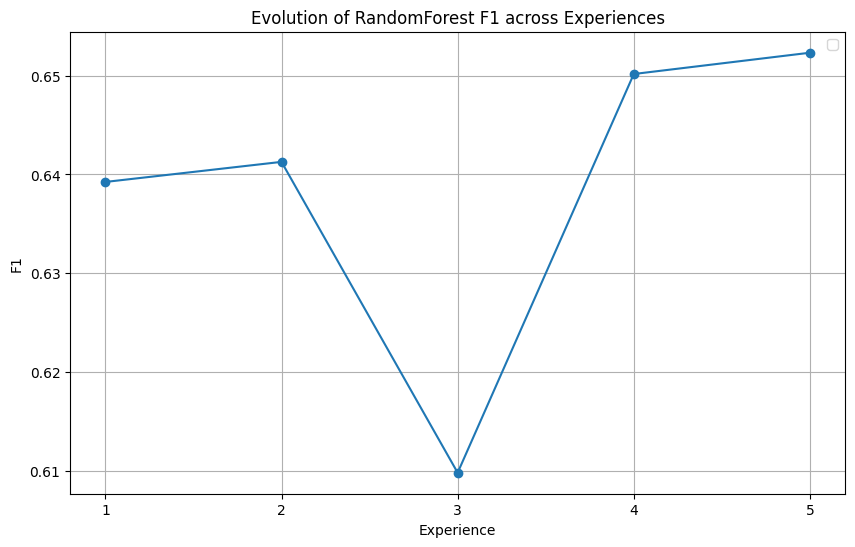

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


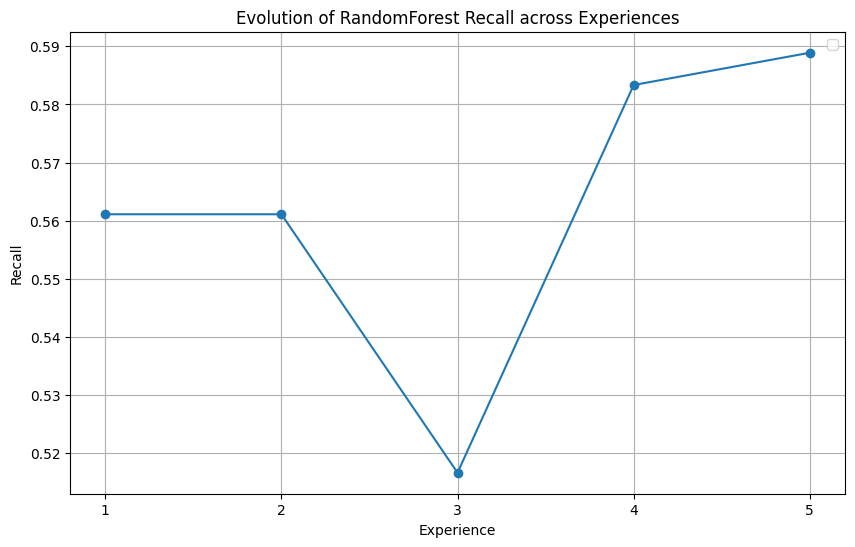

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


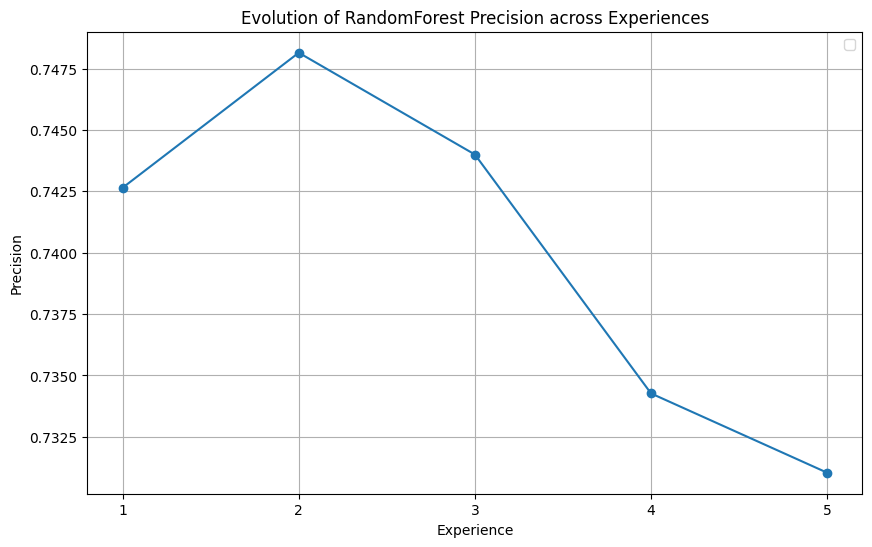

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


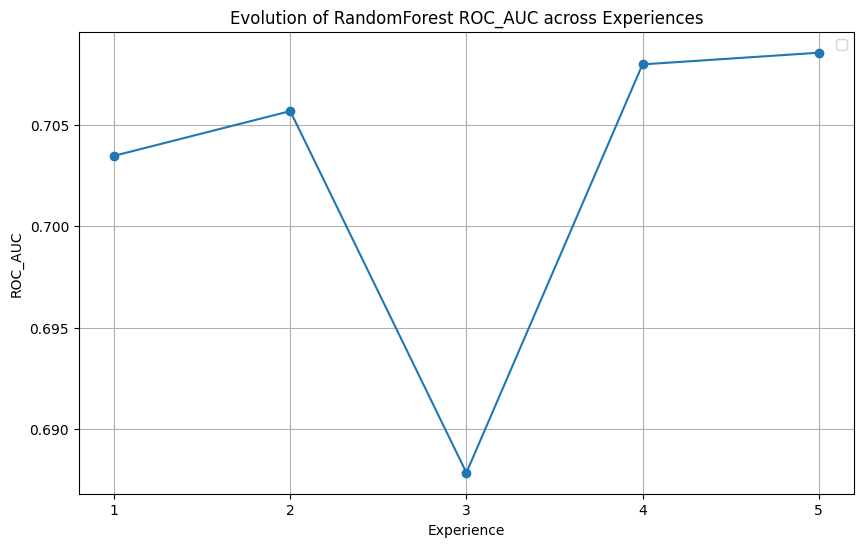

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


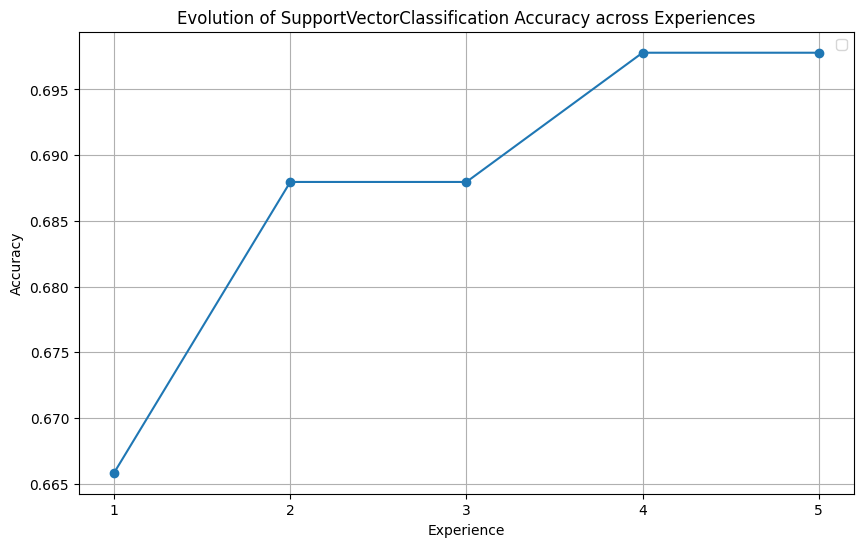

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


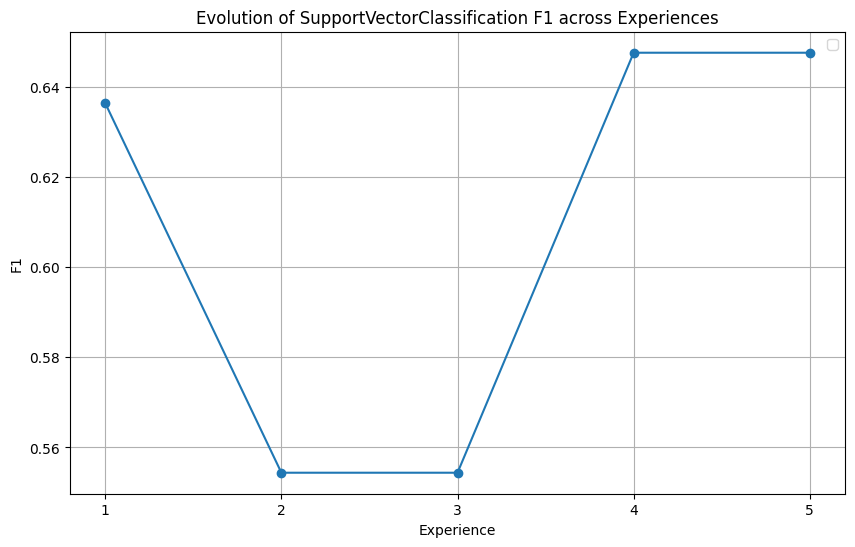

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


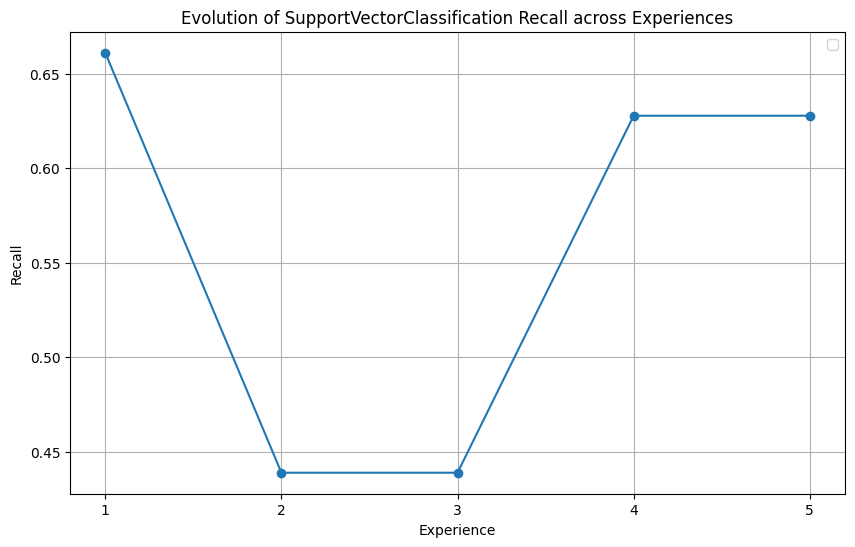

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


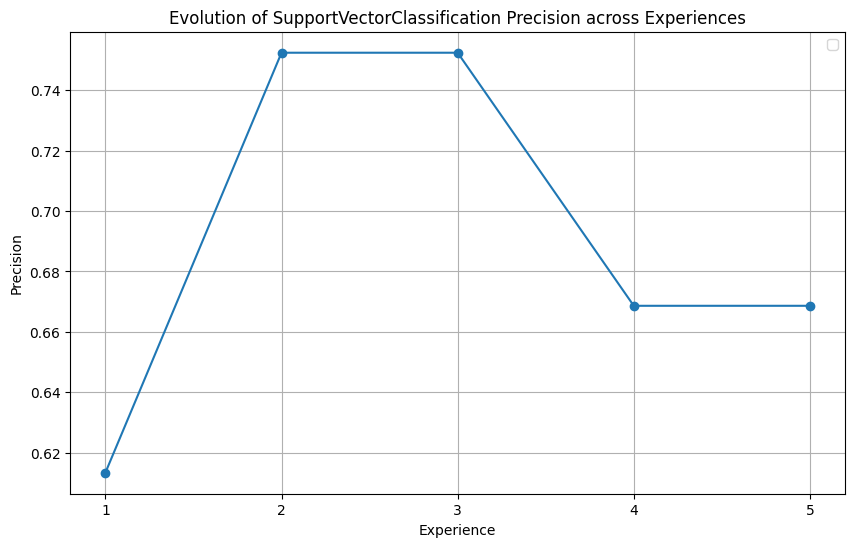

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


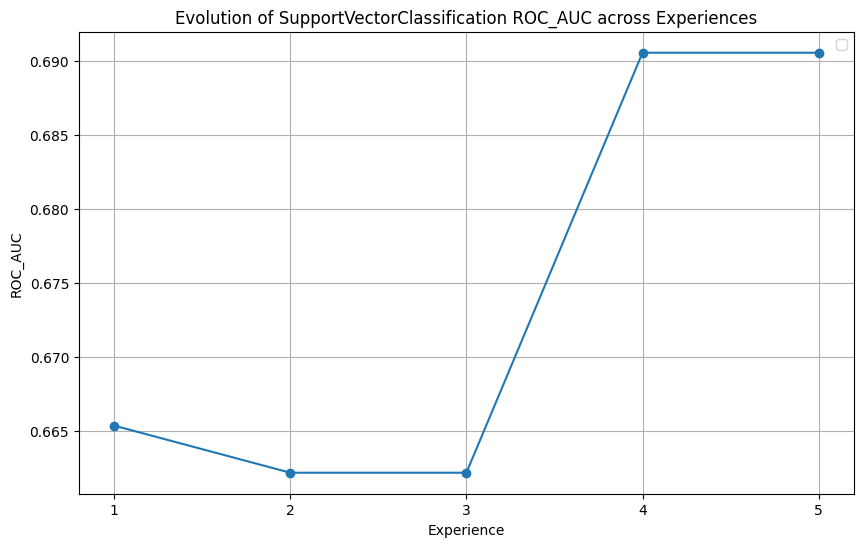

In [76]:
for model_name in models_list:
    for df_metric, metric in metrics_list:
        show_report(get_model_metric(graph_df, model_name, df_metric), model_name, metric)

In [77]:

# for model_name in models_list:
#     show_report(get_model_metric(graph_df, model_name, 'Accuracy_Test'), model_name, 'Accuracy')

In [78]:
# """
# GaussianNaiveBayes,
# K-NearestNeighbors,
# LinearSupportVectorClassification,
# LogisticRegression,
# MLPClassifier,
# Perceptron,
# RandomForest,
# SupportVectorClassification
# """
# gnb_data = graph_df.loc[graph_df['Model'] == "GaussianNaiveBayes", ['Accuracy_Test']]
# knn_data = graph_df.loc[graph_df['Model'] == "K-NearestNeighbors", ['Accuracy_Test']]
# lsvc_data = graph_df.loc[graph_df['Model'] == "LinearSupportVectorClassification", ['Accuracy_Test']]
# lr_data = graph_df.loc[graph_df['Model'] == "LogisticRegression", ['Accuracy_Test']]
# mlp_data = graph_df.loc[graph_df['Model'] == "MLPClassifier", ['Accuracy_Test']]
# pcp_data = graph_df.loc[graph_df['Model'] == "Perceptron", ['Accuracy_Test']]
# rf_data = graph_df.loc[graph_df['Model'] == "RandomForest", ['Accuracy_Test']]
# svc_data = graph_df.loc[graph_df['Model'] == "SupportVectorClassification", ['Accuracy_Test']]
# # Plot the data using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.plot([1,2,3,4,5], gnb_data, marker='o', label='GaussianNaiveBayes')
# plt.plot([1,2,3,4,5], knn_data, marker='o', label='K-NearestNeighbors')
# plt.plot([1,2,3,4,5], lsvc_data, marker='o', label='LinearSupportVectorClassification')
# plt.plot([1,2,3,4,5], lr_data, marker='o', label='LogisticRegression')
# plt.plot([1,2,3,4,5], mlp_data, marker='o', label='MLPClassifier')
# plt.plot([1,2,3,4,5], pcp_data, marker='o', label='Perceptron')
# plt.plot([1,2,3,4,5], rf_data, marker='o', label='RandomForest')
# plt.plot([1,2,3,4,5], svc_data, marker='o', label='SupportVectorClassification')

# # Add labels, title, and legend
# plt.xlabel('Experience')
# plt.ylabel('Value')
# plt.title('Evolution of Multiple Values across Experiences')
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()

In [79]:
# # Create a list of plot functions
# def plot_function(ax, x, y, title):
#     ax.plot(x, y, marker='o')
#     ax.set_title(title)
#     ax.set_xlabel('Experience')
#     ax.set_ylabel('Accuracy')

# # Create the subplots and arrange in a list-like format
# fig, axes = plt.subplots(8, 1, figsize=(8, 24), sharex=True)

# # Plot each dataset in a separate subplot
# plot_function(axes[0], [1,2,3,4,5], gnb_data, 'GaussianNaiveBayes')
# plot_function(axes[1], [1,2,3,4,5], knn_data, 'K-NearestNeighbors')
# plot_function(axes[2], [1,2,3,4,5], lsvc_data, 'LinearSupportVectorClassification')
# plot_function(axes[3], [1,2,3,4,5], lr_data, 'LogisticRegression')
# plot_function(axes[4], [1,2,3,4,5], mlp_data, 'MLPClassifier')
# plot_function(axes[5], [1,2,3,4,5], pcp_data, 'Perceptron')
# plot_function(axes[6], [1,2,3,4,5], rf_data, 'RandomForest')
# plot_function(axes[7], [1,2,3,4,5], svc_data, 'SupportVectorClassification')

# # Adjust the layout and show the plots
# plt.legend()
# plt.tight_layout()
# plt.show()

In [80]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample DataFrame
# data = {
#     'experience': [1, 1, 2, 2, 3, 3],
#     'value1': [10, 15, 8, 20, 5, 12],
#     'value2': [2, 6, 4, 10, 3, 8]
# }

# df = pd.DataFrame(data)

# # Group by 'experience' and calculate the mean for each value
# grouped_data = df.groupby('experience').mean()

# # Plot the data using Matplotlib
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_data.index, grouped_data['value1'], marker='o', label='Value 1')
# plt.plot(grouped_data.index, grouped_data['value2'], marker='o', label='Value 2')

# # Add labels, title, and legend
# plt.xlabel('Experience')
# plt.ylabel('Value')
# plt.title('Evolution of Multiple Values across Experiences')
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()

# Escolher o modelo final

O modelo com o melhor desempenho:
- Melhor Accuracy
- Desempate por F1
- Desempate por ROC_AUC
- Desempate por Precision
- Desempate por Recall

In [81]:
df_final = df_clean.copy()
df_final = df_final.sort_values(['Accuracy_Test', 'F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'], ascending=[False, False, False, False, False])

In [82]:
finalpath = './Analysis_Results/Experience' + str(experience_version_report) + "/finalreport.csv"
finalpath

'./Analysis_Results/Experience3/finalreport.csv'

In [83]:
df_final[['Model', 'Experience', 'Features_List', 'Nr_Features', 'Accuracy_Test', 'F1_Test', 'Precision_Test', 'Recall_Test', 'ROC_AUC_Test', 'TP', 'TN', 'FP', 'FN', '#Terminados(Teste)', '#AnuladosPosContrato(Teste)']].to_csv(finalpath, encoding="latin-1", index=False)

In [84]:
#display(df_final[['Model', 'Experience', 'Features_List', 'Nr_Features', 'Accuracy_Test', 'F1_Test', 'Precision_Test', 'Recall_Test', 'ROC_AUC_Test', 'TP', 'TN', 'FP', 'FN', '#Terminados(Teste)', '#AnuladosPosContrato(Teste)']])

In [85]:
#display(selected_row)

In [86]:
# selected_row = df_final.iloc[0]

# print(selected_row)